# Clustering jerárquico

## **Definición**
El clustering jerárquico implica la creación de grupos que tienen un orden predeterminado de arriba hacia abajo. El algortimo de clúster jerárquico agrupa los datos basándose en la distancia entre cada uno y buscando que los datos que están dentro de un clúster sean los más similares entre sí. Se utilizan para el agrupamiento de patrones de los cuales se desconoce la organización interna que tienen, es decir, no existe conocimiento acerca de la etiqueta de clase a la que pertenecen. Estos algoritmos trabajan uniendo o dividiendo en cada paso o iteración el par de grupos más semejante.


### Método divisivo (Top-down o de arriba hacia abajo)
En este método asignamos todas las observaciones (o instancias) a un solo clúster y luego dividimos el clúster en dos clústers más similares a nivel de grupo. Finalmente, procedemos recursivamente con cada clúster hasta que haya un clúster para cada observación.


### Método aglomerativo (Bottom-up o de abajo hacia arriba)
En este método asignamos cada observación (o instancia) a su propio cluster. Luego, calculamos la similitud (por ejemplo, la **distancia euclídea**) entre cada uno de los clústers y unimos los dos clústers más similares. Finalmente, se repiten los pasos 2 y 3 hasta que solo quede un único cluster.


## **Matriz de distancia o enlace**
Antes de realizar el clustering, se requiere determinar la matriz de proximidad que contiene la distancia entre cada punto utilizando una función de distancia. Luego, la matriz se actualiza para mostrar la distancia entre cada cluster. Los siguientes tres métodos difieren en cómo se mide la distancia entre cada cluster.


### Enlace único o simple
En el clustering jerárquico de enlace único o simple, **la distancia entre dos clústers se define como la mínima distancia entre dos puntos de cada cluster**. Por ejemplo, la distancia entre los grupos "r" y "s" a la izquierda es igual a la longitud de la flecha entre los dos puntos más próximos.

<img src=img/Clustering_single.png>


### Enlace completo
En el clustering jerárquico de enlace completo, **la distancia entre dos grupos se define como la distancia más larga entre dos puntos en cada cluster**. Por ejemplo, la distancia entre los grupos "r" y "s" es igual a la longitud de la flecha entre los dos puntos más lejanos.

<img src=img/Clustering_complete.png>


### Enlace promedio
En el clustering jerárquico de enlace promedio, **la distancia entre dos conglomerados se define como la distancia promedio entre cada punto de un clúster y cada punto del otro clúster**. Por ejemplo, la distancia entre los grupos "r" y "s" es igual a la longitud promedio entre los puntos de conexión de uno y otro clúster.

<img src=img/Clustering_average.png>


## **Dendogramas**
Los **dendogramas** son diagramas de árbol que se utilizan con frecuencia para ilustrar la disposición de los clústers producidos por el clustering jerárquico. Los **clados** (o clústers hijos) se ordenan de acuerdo a cuán similares (o diferentes) son.
* Los clados que están cerca de la misma altura son similares entre sí.
* los clados con diferentes alturas son diferentes: cuanto mayor es la diferencia de altura, mayor es la diferencia.
A continuación se muestra un ejemplo relacionado con el conocido conjunto de datos Iris.

<img src=img/Iris_dendrogram.png height='400px' width = '400px'>

## 4. Demo

Ahora vamos a realizar una demo de clustering jerárquico sobre un dataset de tendencias de compra en un centro comercial.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 4.1. Importación del dataset

In [3]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### 4.2. EDA y Visual EDA

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


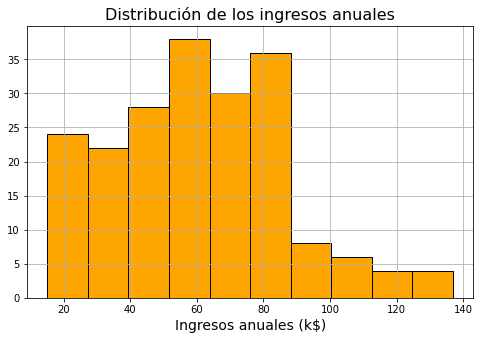

In [5]:
# Muestra mediante diagramas de barras la distribución de la la variable 'Ingresos Anuales (kEUR)'

plt.figure(figsize=(8,5))
plt.title("Distribución de los ingresos anuales",fontsize=16)
plt.xlabel ("Ingresos anuales (k$)",fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='orange',edgecolor='k')
plt.show()

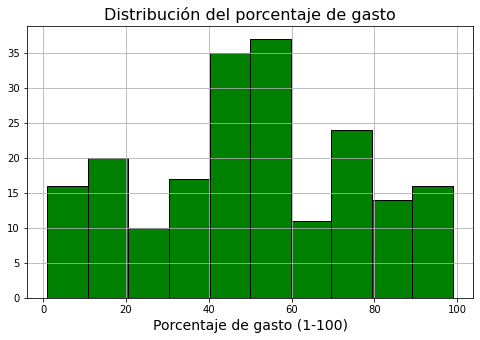

In [6]:
# Muestra mediante diagramas de barras la distribución de la la variable ‘Porcentaje_de_gasto’

plt.figure(figsize=(8,5))
plt.title("Distribución del porcentaje de gasto",fontsize=16)
plt.xlabel ("Porcentaje de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color='green',edgecolor='k')
plt.show()

Entonces, ¿existe una correlación definitiva entre los ingresos anuales (annual income) y el porcentaje de gasto (spending score)? - *Aparentemente no*

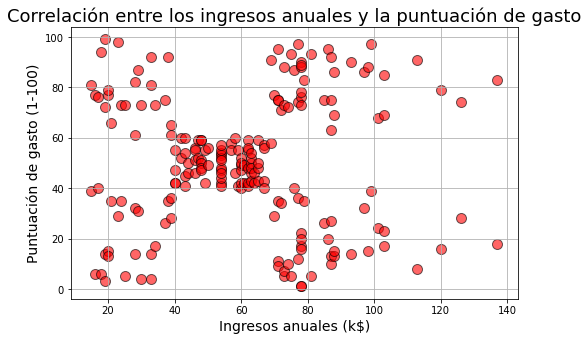

In [7]:
plt.figure(figsize=(8,5))
plt.title("Correlación entre los ingresos anuales y la puntuación de gasto",fontsize=18)
plt.xlabel ("Ingresos anuales (k$)",fontsize=14)
plt.ylabel ("Puntuación de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

¿Existe una correlación entre la edad (age) y el porcentaje de gasto (spending score)? - *Aparentemente no*

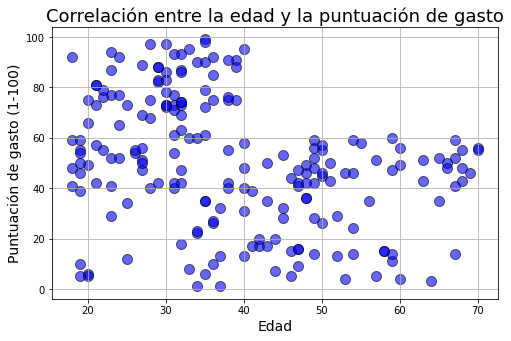

In [8]:
plt.figure(figsize=(8,5))
plt.title("Correlación entre la edad y la puntuación de gasto",fontsize=18)
plt.xlabel ("Edad",fontsize=14)
plt.ylabel ("Puntuación de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

Propuesta: repite los dos gráficos anteriores, pero en esta ocasión cambiando el color de los círculos (markers), en función del sexo de la persona.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

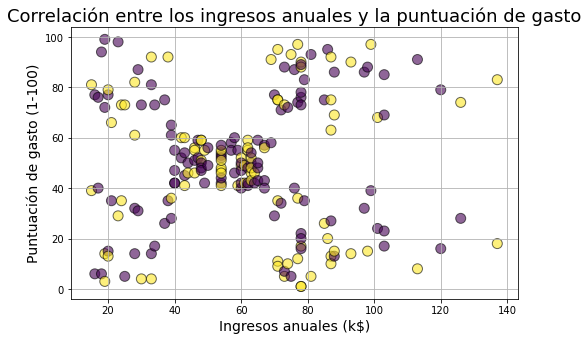

In [10]:
plt.figure(figsize=(8,5))
plt.title("Correlación entre los ingresos anuales y la puntuación de gasto",fontsize=18)
plt.xlabel ("Ingresos anuales (k$)",fontsize=14)
plt.ylabel ("Puntuación de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Gender'],edgecolor='k',alpha=0.6, s=100) # se puede poner una variable como color, pero debemos que preprocesarla
plt.show()

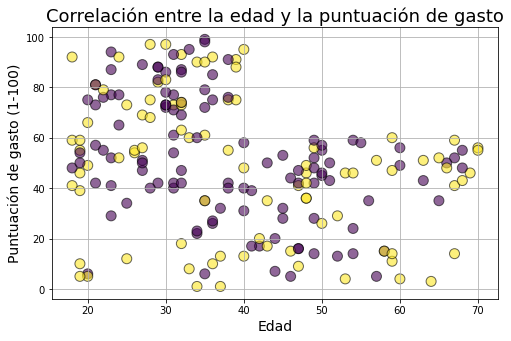

In [11]:
plt.figure(figsize=(8,5))
plt.title("Correlación entre la edad y la puntuación de gasto",fontsize=18)
plt.xlabel ("Edad",fontsize=14)
plt.ylabel ("Puntuación de gasto (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],c=df['Gender'],edgecolor='k',alpha=0.6, s=100)
plt.show()

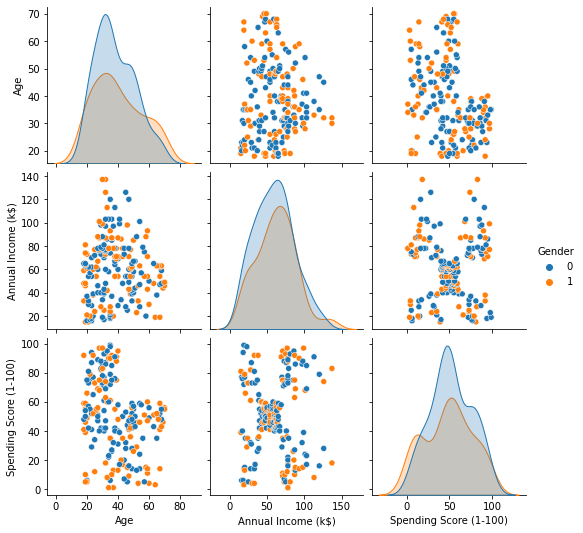

In [12]:
import seaborn as sbn
sbn.pairplot(df[["Age","Annual Income (k$)", "Spending Score (1-100)", "Gender"]], hue="Gender")

### 4.3. Estrategia

**Por lo tanto, exploraremos agrupar a los clientes en función de sus ingresos anuales y puntuación de gasto para ver si hay grupos distintivos a los que el centro comercial puede dirigirse.**

Podríamos usar K-means pero no tenemos ni idea sobre la cantidad de grupos ocultos. Veremos que el agrupamiento jerárquico con dendogramas nos dará una buena idea del número óptimo de clústeres/agrupamientos.

### 4.4. Dendogramas

In [13]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [14]:
X = df.iloc[:,[3,4]].values

#### 4.4.1. Matriz de distancia _Ward_

En este ejemplo para crear un dendograma no utilizaremos las medidas de distancia entre clústers clásicas (simple, completo, premedio), sino que utilizaremos la matriz de distancia 'Ward'.
$$d(u,v) = \sqrt{\frac{|v|+|s|}{T}d(v,s)^2+ \frac{|v|+|t|}{T}d(v,t)^2- \frac{|v|}{T}d(s,t)^2}$$

donde **$u$** es el clúster recién unido que consta de los clústeres **$s$** y **$t$**, **$v$** es un clúster todavía no utilizado, **$ T=|v|+|s|+|t|$**, y **$|*|$** es la cardinalidad de su argumento. Esto también se conoce como el algoritmo incremental.
**El Criterio de Varianza Mínima de Ward minimiza la varianza total dentro de los clústers**. Es decir, minimiza la suma, sobre todos los clusters, de la varianza dentro de cada cluster. En cada paso del algoritmo se debe encontrar el par de clústers que llevan al incremento mínimo de la varianza total dentro de los clústers después de mezclarlos. El par de clústers que al unirse hagan mínima la varianza total dentro de los clúster, son mezclados. En el paso inicial, todos los clúster contienen un punto único (solitario). Para aplicar el algoritmo recursivo bajo esta función objetivo, la distancia inicial entre los objetos individuales debe ser proporcional al cuadrado de la distancia euclídea.

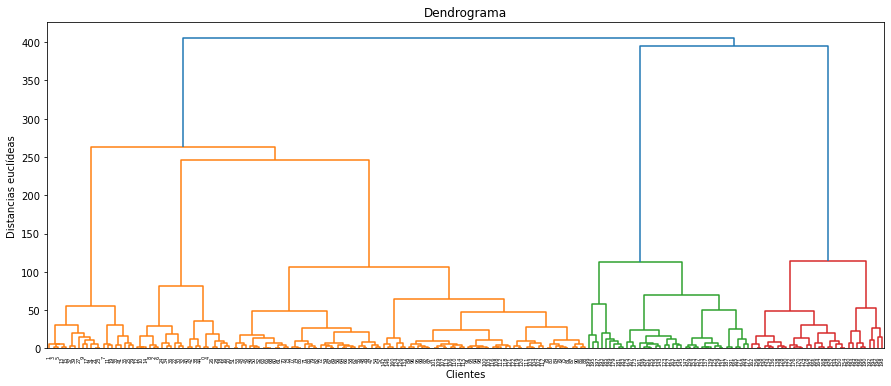

In [15]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias euclídeas')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

#### 3.4.2. Número óptimo de clústers

A menudo, el número óptimo de grupos se puede encontrar a partir de un dendograma de una manera sencilla.
* Busca el tramo más largo de la línea vertical que no esté atravesado por ninguna línea horizontal ***extendida*** (aquí *extendida* significa líneas horizontales, es decir, los divisores del grupo se extienden infinitamente en ambas direcciones).
* Ahora en el medio de ese tramo de línea y dibuja una línea horizontal imaginaria.
* Cuenta cuántas líneas verticales cruzaron esas líneas imaginarias.
* Es probable que esa sea la cantidad óptima de clústeres.

**La idea se muestra en la siguiente figura. En este caso, el número óptimo de clústeres podría ser 5.**

Buscamos la linea vertical mas larga y trazamos una linea por la mitad. La cantidad de lineas verticales que corte, sera nuestro k optimo.

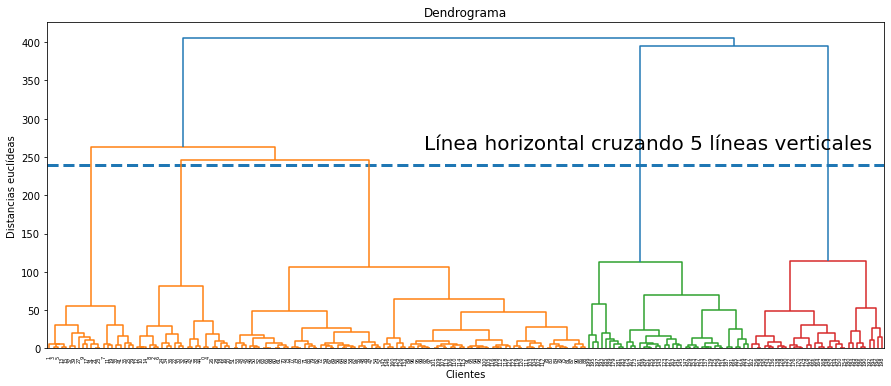

In [16]:
plt.figure(figsize=(15,6))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias euclídeas')
plt.hlines(y=240,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=260,s='Línea horizontal cruzando 5 líneas verticales',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

## 3.5. Clustering Jerárquico

### 3.5.1. Creación del modelo

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### 3.5.2. Trazado de los grupos y etiquetado de los tipos de clientes
* _Cuidadoso_ - altos ingresos, pero bajos gastos
* _Estándar_: ingresos medios y consumidores medios
* **_Grupo objetivo_: ingresos medio-altos y grandes consumidores (objetivo del centro comercial)**
* _Descuidado_: bajos ingresos, pero grandes consumidores (debe evitarse debido al posible riesgo crediticio)
* _Sensible_ - bajos ingresos y bajos gastos

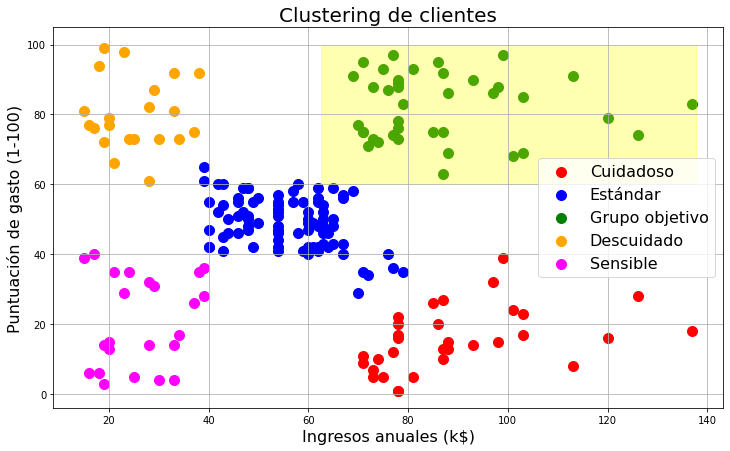

In [18]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cuidadoso')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Estándar')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Grupo objetivo')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Descuidado')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering de clientes',fontsize=20)
plt.xlabel('Ingresos anuales (k$)',fontsize=16)
plt.ylabel('Puntuación de gasto (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()

## 3.6. Verificación del número óptimo de clústers por el algoritmo de K-means

Dado un conjunto de observaciones $(x_1, x_2, …, x_n)$, donde cada observación es un vector d-dimensional de valores reales, [**k-means clustering**](https://en.wikipedia.org/wiki/K-means_clustering) pretende particionar las *$n$* observaciones en *$k$* (≤ *$n$*) conjuntos $S = {S_1, S_2, …, S_k}$ para minimizar el suma de los cuadrados intraclúster (WCSS within-clúster sum of squares) (i.e. variance). Formalmente, el objetivo es encontrar:

$${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

donde $\mu_i$ es la media de puntos en $S_i$.

Ejecutamos el modelo K-means++ con centroides cuidadosamente inicializados iterando sobre el número de grupos (1 a 15) y mostramos ***la matriz de valores de suma de cuadrados de los clústers (WCSS)*** para determinar el número óptimo de clústers por el método del Elbow.

In [19]:
from sklearn.cluster import KMeans

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


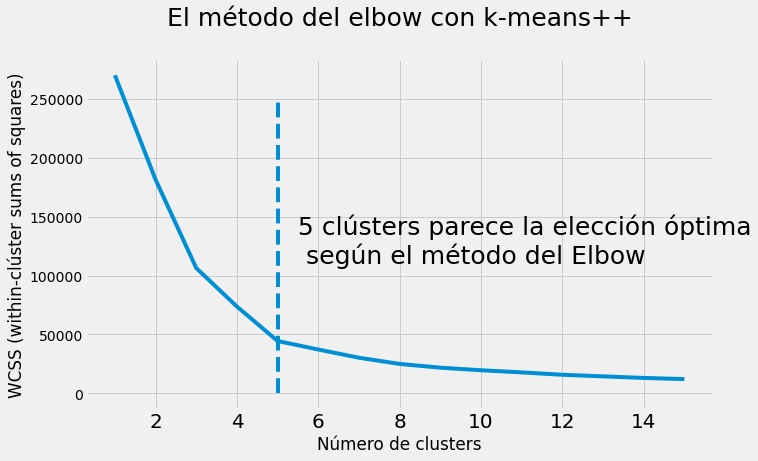

In [20]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('El método del elbow con k-means++\n',fontsize=25)
    plt.xlabel('Número de clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-clúster sums of squares)')
    plt.vlines(x=5,ymin=0,ymax=250000,linestyles='--')
    plt.text(x=5.5,y=110000,s='5 clústers parece la elección óptima\n según el método del Elbow',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()